# LINEAR REGRESSION  also called parametric algo

REGRESSION IS THE STAISTICAL METHOD OF FITTING A LINE ON THE VALUES

BASIC FUNCTION IS LINEAR REGRESSION IS    
                     
    HYPOTHESIS FUNTION------------->    Y=B0+B1*X1+B2*X2+........+Bn*Xn
                     
                     B0, B1,Bn = WEIGHTS THAT ARE NEED TO BE UPDATED TO GET THE PERFECT LINE
                     Y = DEPENDENT VARIABLE
                     X1,X2,Xn = INDEPENDENT VARIABLE
                 
    ERROR/COST FUNCTION------------>   J= min((1/n)SUBMITION((PREDICTi - Yi)^2))
    
                       COST FUNCTION HELPS US TO FIGURE OUT THE BEST POSSIBLE VALUE FOR THE WEIGHT WHICH
                       PROVIDE THE BEST FIT LINE FOR THE DATA POINT
                       IT DHOULD BE MINIMIZED
                       COST FUNCTION GIVES AVG MEAN SQUARED ERROR HENCE IT IS CALLED MEAN SQAURE ERROR FUNCTION
                       
    GRADIENT DESCENT--------------->  
                       METHOD OF UPDATING WEIGHTS TO REDUCE COST FUNCTION 
                       THE IDEA IS THAT  WE START WITH SOME VALUE FOR WEIGHT AND THEN WE CHNAGE THESE VALUES ITERATIVELY TO REDUCE COST, GRADIENT DESCENT HELPS US TO CHANGE THE VALUE 
                       
                       NO OF STEPS WE TAKE IN GRADIENT DESCENT IS CALLED LEARNING RATE AND IT DECIDES HOW FAST ALGO CONVERGES TO THE MINIMA.
                       IF LEARNING RATE TOO HIGH TIME TAKEN HIGH
                       IF LEARNING RATE TOO LOW  ALGO MIGHT OVER STEP THE ALGO
                       
                       THE MAIN METHOD OF GRADIENT DESCENT IS TAKING NEGATIVE PARTIAL DERIVATIVE OF THE COST FUNCTION (J) WITH RESPECT TO WEIGHTS AND UPDATE THE WEIGHTS CORRESPONDINGLY
                       
                       THE MAIN FORMULAE OF GRADIENT DESCENT IS Bn=Bn-LR(PARTIAL DERIVATIVE(J)WRT(An))
                       
## TYPES OF LINEAR REGRESSION 

          1. SIMPLE LINEAR REGRESSION 
          2. MULTIPLE LINEAR REGRESSION
          3. POLYNOMIAL LINEAR REGRESSION
          
## Bias Error

Bias are the simplifying assumptions made by a model to make the target function easier to learn.

Generally, parametric algorithms have a high bias making them fast to learn and easier to understand but generally less flexible. In turn, they have lower predictive performance on complex problems that fail to meet the simplifying assumptions of the algorithms bias.

         Low Bias: Suggests less assumptions about the form of the target function.
         High-Bias: Suggests more assumptions about the form of the target function.


Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

## Variance Error

Variance is the amount that the estimate of the target function will change if different training data was used.

The target function is estimated from the training data by a machine learning algorithm, so we should expect the algorithm to have some variance. Ideally, it should not change too much from one training dataset to the next, meaning that the algorithm is good at picking out the hidden underlying mapping between the inputs and the output variables.

Machine learning algorithms that have a high variance are strongly influenced by the specifics of the training data. This means that the specifics of the training have influences the number and types of parameters used to characterize the mapping function.

        Low Variance: Suggests small changes to the estimate of the target function with changes to the training dataset.

        High Variance: Suggests large changes to the estimate of the target function with changes to the training dataset.

Generally, nonparametric machine learning algorithms that have a lot of flexibility have a high variance. For example, decision trees have a high variance, that is even higher if the trees are not pruned before use.

Examples of low-variance machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

Examples of high-variance machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

## Bias-Variance Trade-Off

The goal of any supervised machine learning algorithm is to achieve low bias and low variance. In turn the algorithm should achieve good prediction performance.

You can see a general trend in the examples above:

Parametric or linear machine learning algorithms often have a high bias but a low variance.

Non-parametric or non-linear machine learning algorithms often have a low bias but a high variance.

The parameterization of machine learning algorithms is often a battle to balance out bias and variance.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import time
%matplotlib inline

In [42]:
x,y=make_regression(n_samples=500,n_features=1,bias=4.2,noise=5.1)

(500, 1)

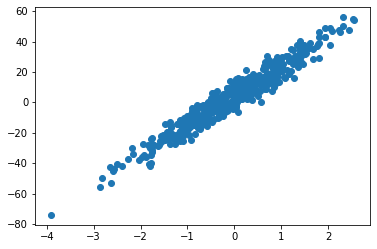

In [43]:
plt.scatter(x,y)
x.shape

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2,random_state=42)

In [45]:
xtest.shape

(100, 1)

In [46]:
def hypothesis(x,w):
    x0=1
    y=w[0]*x0+x*w[1]       #simple linear regression
    return y

In [47]:
def cost_function(x,ytrue,w):
    error=0.0
    m=x.shape[0]
    for i in range(m):
        error=error + (ytrue[i]-hypothesis(x[i],w))**2
    error=error/(2*m)
    return error

In [48]:
def gradient_function(x,ytrue,w):
    grad_0=0.0
    grad_1=0.0
    m=x.shape[0]
    for i in range(m):
        grad_0=grad_0+ (hypothesis(x[i],w)-ytrue[i])
        grad_1=grad_1+ (hypothesis(x[i],w)-ytrue[i])*x[i]
    grad_0=grad_0/m
    grad_1=grad_1/m
    return [grad_0,grad_1]

In [49]:
def gradient_descent(x,ytrue,w,lr=0.01):
    error=cost_function(x,ytrue,w)
    [grad_0,grad_1]=gradient_function(x,ytrue,w)
    w[0]=w[0]-lr*grad_0
    w[1]=w[1]-lr*grad_1
    return error,w

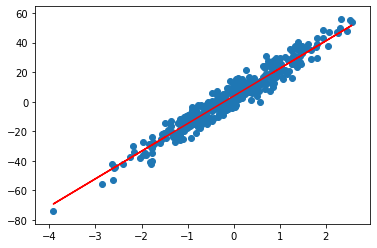

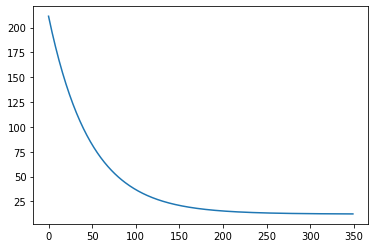

weights: [ 3.89333818 18.65277557]


In [57]:
w=np.array([0.0,0.0])
loss=[]
max_iteration=350
for i in range(max_iteration):
    error,w=gradient_descent(xtrain,ytrain,w,lr=0.01)
    loss.append(error)
    yprediction=w[0]+w[1]*xtrain
    plt.plot(xtrain,yprediction,'r')
    plt.scatter(xtrain , ytrain)
    plt.show()
    plt.plot(loss)
    plt.show()
    print("weights:",w)
    time.sleep(0.1)
    clear_output(wait=True)